# Analizando el modelo Sugarscape.
**A continuación se presenta un análisis de los datos arrojados por algunos experimentos realizados con el modelo de Sugarscape. Veremos la relación de la variable de dotación inicial (maximum-sugar-endowment y minimum-sugar-endowment) y las métricas del índice GINI, la cantidad de decesos por hambre (starvation) y el grado de productividad**
## Limpiando el dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
sns.set()

In [2]:
df = pd.read_csv('productividad/productivity.csv')
df.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,400,0,0.0,0,0.0,0
1,2,0,10,color-agents-by-decile,400,0,0.0,0,0.0,0
2,3,0,20,color-agents-by-decile,400,0,0.0,0,0.0,0
3,4,0,30,color-agents-by-decile,400,0,0.0,0,0.0,0
4,5,0,40,color-agents-by-decile,400,0,0.0,0,0.0,0


In [3]:
df = df.drop(columns='visualization')
df = df.drop(df[df['[step]'] == 0].index) # aquellas runs que no se iniciaron
df = df.drop(columns='[run number]')
df = df.drop(columns='initial-population') #poblacion fija
df = df.drop(columns='[step]') # en este punto, todas las runs son validas y llegaron a la it final
df

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.505955,6322,41.390950,16034
42,20,0,0.476398,5440,42.374600,16328
43,20,10,0.467143,4745,45.700650,18057
63,30,0,0.476218,4761,44.283125,17857
64,30,10,0.456689,4238,45.599350,18374
...,...,...,...,...,...,...
435,200,150,0.190918,400,171.173825,67885
436,200,160,0.199800,372,176.193525,68841
437,200,170,0.185262,346,178.665475,71519
438,200,180,0.176211,325,187.057250,74191


In [4]:
#df.info()
#df.describe()
#df.columns
df.shape

(210, 6)

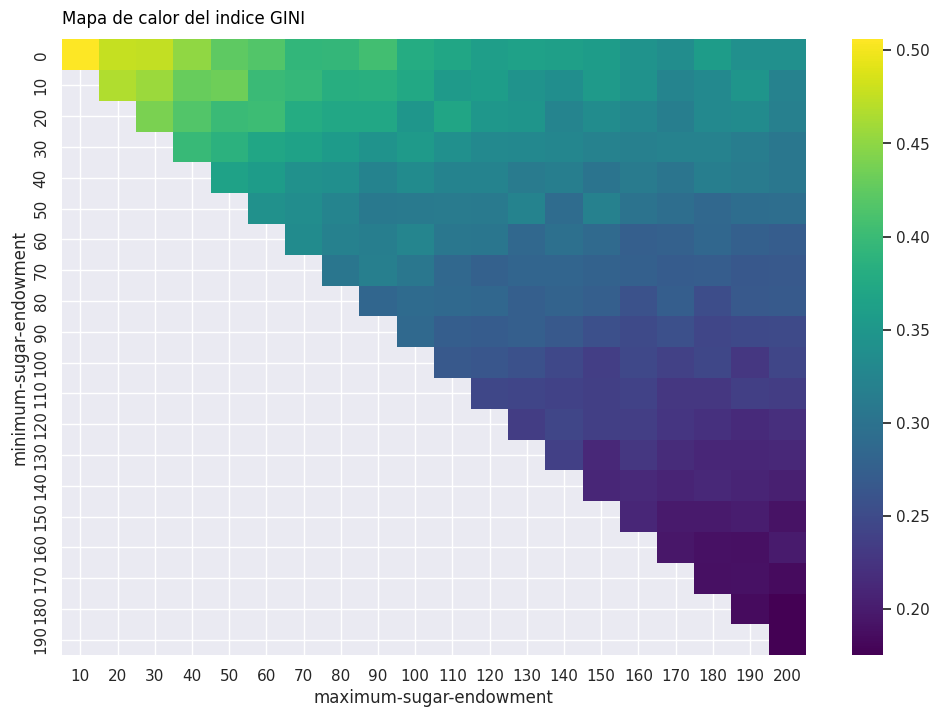

In [5]:
datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-gini")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor del indice GINI', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Mapa de calor GINI.png',dpi=300, bbox_inches='tight')
plt.show()

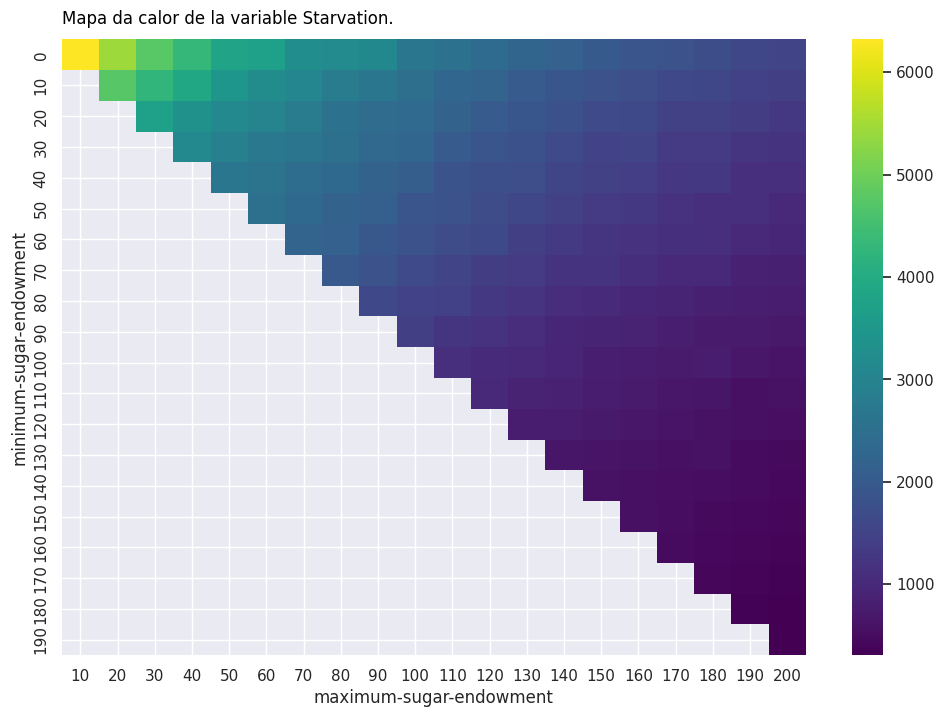

In [6]:

#La visualizacion del valor starvation ahora es mejor
plt.figure(figsize=(12, 8)) 
datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="starvation")
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa da calor de la variable Starvation.', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Mapa de calor Starvation.png',dpi=300, bbox_inches='tight')
plt.show()

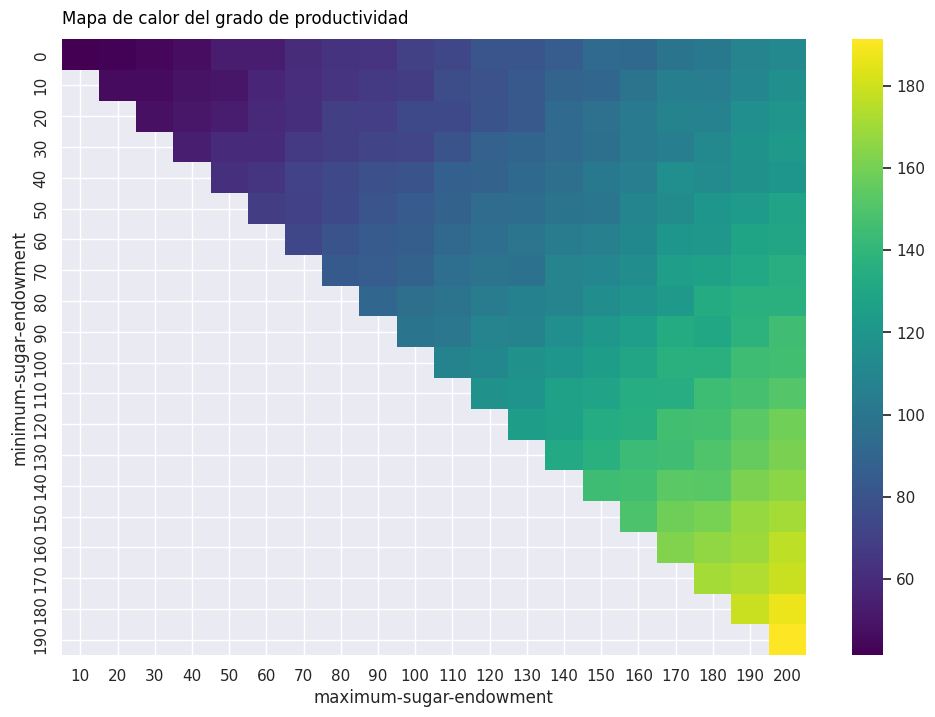

In [7]:
datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-productivity")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor del grado de productividad', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Mapa de calor productividad.png',dpi=300, bbox_inches='tight')
plt.show()

In [8]:
correlacion = df['avg-gini'].corr(df['avg-productivity'])
print(f"La correlación entre el coeficiente GINI y la productividad es de: {correlacion}")
correlacion = df['avg-gini'].corr(df['starvation'])
print(f"La correlación entre el coeficiente GINI y starvation es de: {correlacion}")
correlacion = df['starvation'].corr(df['avg-productivity'])
print(f"La correlación entre starvation y la productividad es de: {correlacion}")


La correlación entre el coeficiente GINI y la productividad es de: -0.9387311587959669
La correlación entre el coeficiente GINI y starvation es de: 0.9467550731082013
La correlación entre starvation y la productividad es de: -0.9068587751699908


# Universal Basic Income, Apoyos dirigidos, Apoyo lineal y cuadrático
**Dados las diferentes formas de redistribuir la riqueza, nos interesa saber cuál es aquella que disminuye la desigualdad y mantiene la mayor productividad. Los anteriores resultados se realizaron sin políticas de redistribución, por lo que ahora probaremos las maneras en las que el modelo redistribuye la riqueza.**


## Analizando los resultados de la implementación de redistribución por Renta Básica Universal.

In [9]:
datos_ubi = pd.read_csv('UBI/ubi.csv')
datos_ubi.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,UBI,400,0,0.455235,2381,30.869675,11257
1,2,0,10,color-agents-by-decile,UBI,400,0,0.000000,0,0.000000,0
2,3,0,20,color-agents-by-decile,UBI,400,0,0.000000,0,0.000000,0
3,4,0,30,color-agents-by-decile,UBI,400,0,0.000000,0,0.000000,0
4,5,0,40,color-agents-by-decile,UBI,400,0,0.000000,0,0.000000,0


In [10]:
datos_ubi = datos_ubi.drop(columns='visualization')
datos_ubi = datos_ubi.drop(columns='initial-population')
datos_ubi = datos_ubi.drop(columns='redistribution')
datos_ubi = datos_ubi.drop(columns='[run number]')
datos_ubi = datos_ubi.drop(datos_ubi[datos_ubi['[step]'] == 0].index)
datos_ubi = datos_ubi.drop(columns='[step]')
datos_ubi

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.174899,4762,10.004850,4058
42,20,0,0.156164,3988,10.431825,4163
43,20,10,0.150394,4777,10.615475,4264
63,30,0,0.184115,3583,11.192425,3846
64,30,10,0.161936,2680,12.099350,4694
...,...,...,...,...,...,...
435,200,150,0.032165,0,142.667425,57664
436,200,160,0.031989,0,146.676550,60342
437,200,170,0.032036,0,151.253075,60383
438,200,180,0.031478,0,156.087525,62546


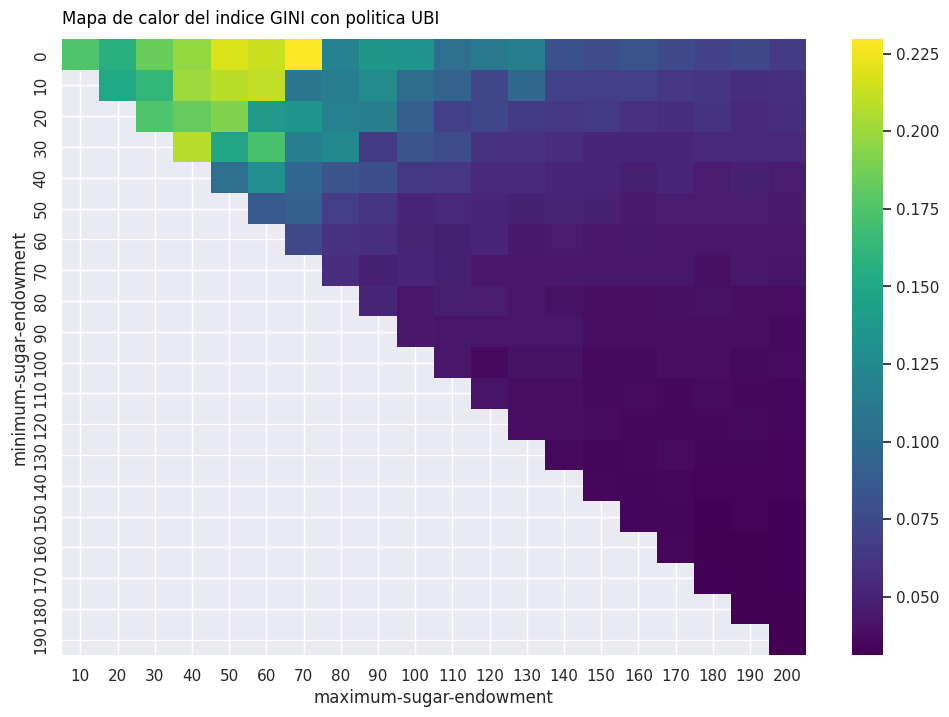

In [11]:
datos_aplanados = datos_ubi.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-gini")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor del indice GINI con politica UBI', fontsize=12, color='black', ha='left')
plt.savefig('figuras/GINI-UBI.png',dpi=300, bbox_inches='tight')
plt.show()

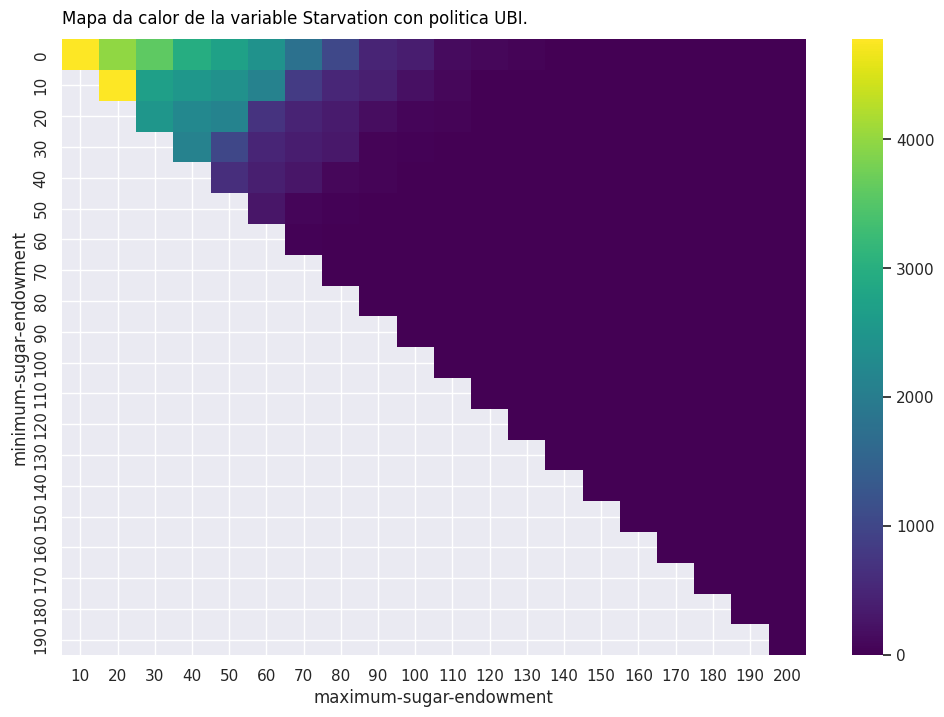

In [12]:
plt.figure(figsize=(12, 8)) 
datos_aplanados = datos_ubi.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="starvation")
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa da calor de la variable Starvation con politica UBI.', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Starv-UBI.png',dpi=300, bbox_inches='tight')
plt.show()

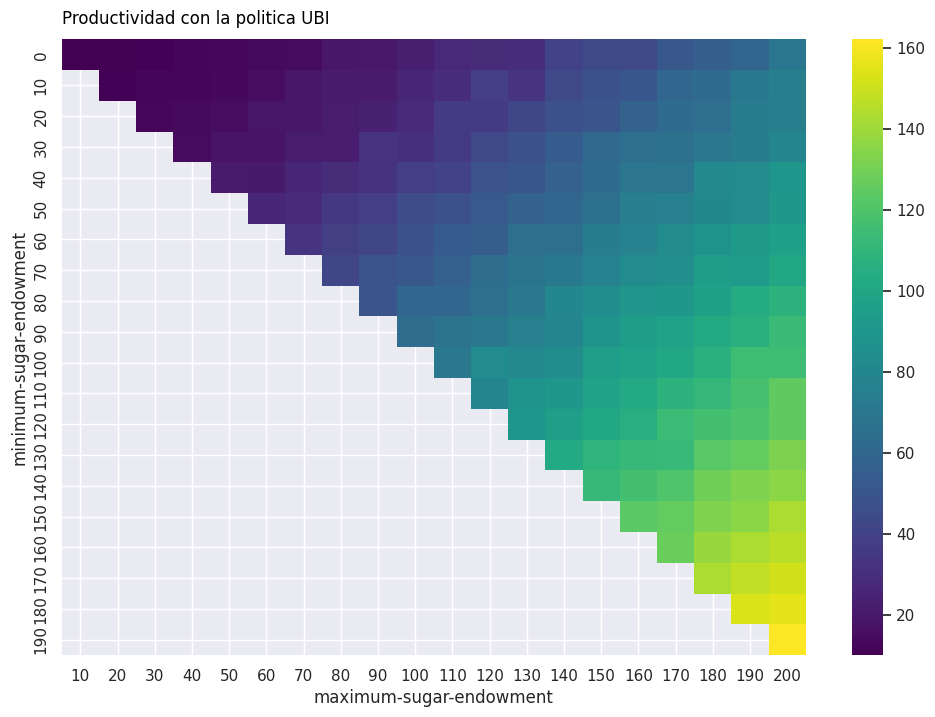

In [13]:
datos_aplanados = datos_ubi.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-productivity")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Productividad con la politica UBI', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Productividad-UBI.png',dpi=300, bbox_inches='tight')
plt.show()

# Analizando los resultados de la implementación de la política de redistribución lineal

In [14]:
datos_lineal = pd.read_csv('lineal/lineal.csv')
datos_lineal.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,linear,400,0,0.153463,0,55.522275,16026
1,2,0,10,color-agents-by-decile,linear,400,0,0.000000,0,0.000000,0
2,3,0,20,color-agents-by-decile,linear,400,0,0.153463,0,55.522275,16026
3,4,0,30,color-agents-by-decile,linear,400,0,0.153463,0,55.522275,16026
4,5,0,40,color-agents-by-decile,linear,400,0,0.153463,0,55.522275,16026


In [17]:
datos_lineal = datos_lineal.drop(columns='redistribution')
datos_lineal = datos_lineal.drop(columns='visualization')
datos_lineal = datos_lineal.drop(columns='[run number]')
datos_lineal = datos_lineal.drop(columns='initial-population')
datos_lineal = datos_lineal.drop(datos_lineal[datos_lineal['[step]'] == 0].index)
datos_lineal

,maximum-sugar-endowment,minimum-sugar-endowment,[step],avg-gini,starvation,avg-productivity,total-wealth
21,10,0,1000,0.233716,5517,4.635225,1816
42,20,0,1000,0.194883,4223,5.617975,2241
43,20,10,1000,0.211229,3539,5.874825,2308
63,30,0,1000,0.223345,3839,6.011350,2532
64,30,10,1000,0.234000,2938,6.604800,2591
...,...,...,...,...,...,...,...
435,200,150,1000,0.068358,0,138.786025,55833
436,200,160,1000,0.069144,0,143.218650,57587
437,200,170,1000,0.068771,0,146.877850,58386
438,200,180,1000,0.066441,0,153.812800,63282


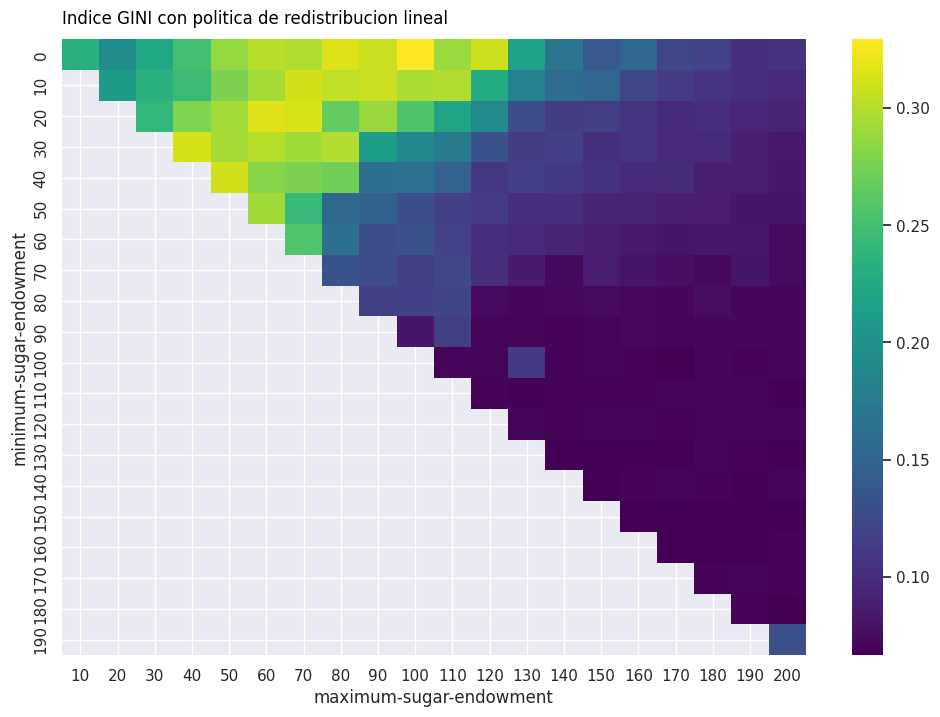

In [18]:
datos_aplanados = datos_lineal.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-gini")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Indice GINI con politica de redistribucion lineal', fontsize=12, color='black', ha='left')
plt.savefig('figuras/GINI-lineal.png',dpi=300, bbox_inches='tight')
plt.show()

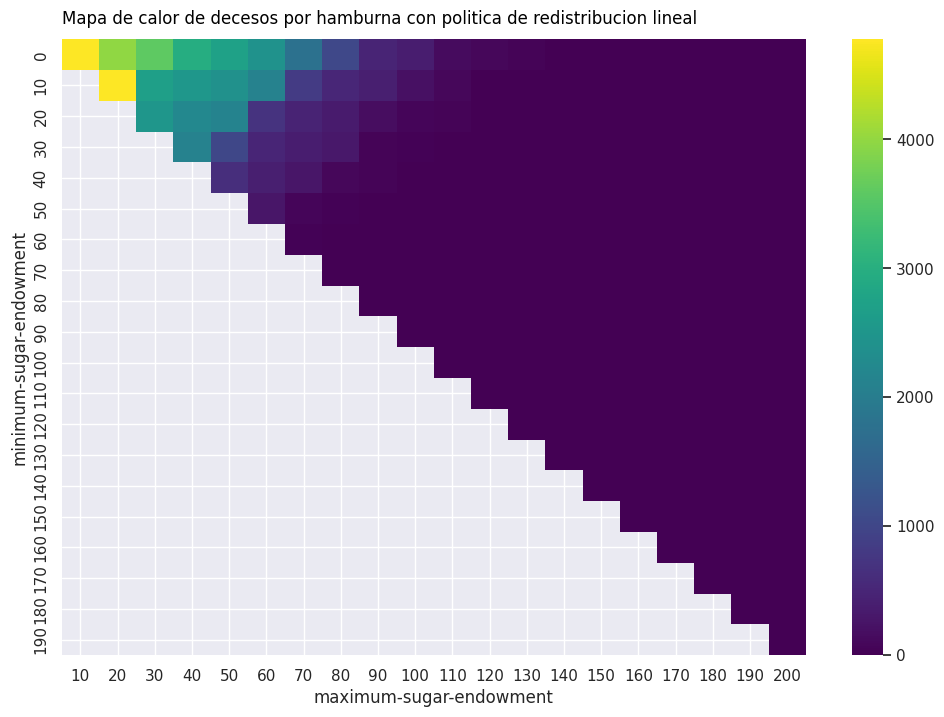

In [19]:
datos_aplanados = datos_ubi.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="starvation")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de decesos por hamburna con politica de redistribucion lineal', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Starv-lineal.png',dpi=300, bbox_inches='tight')
plt.show()

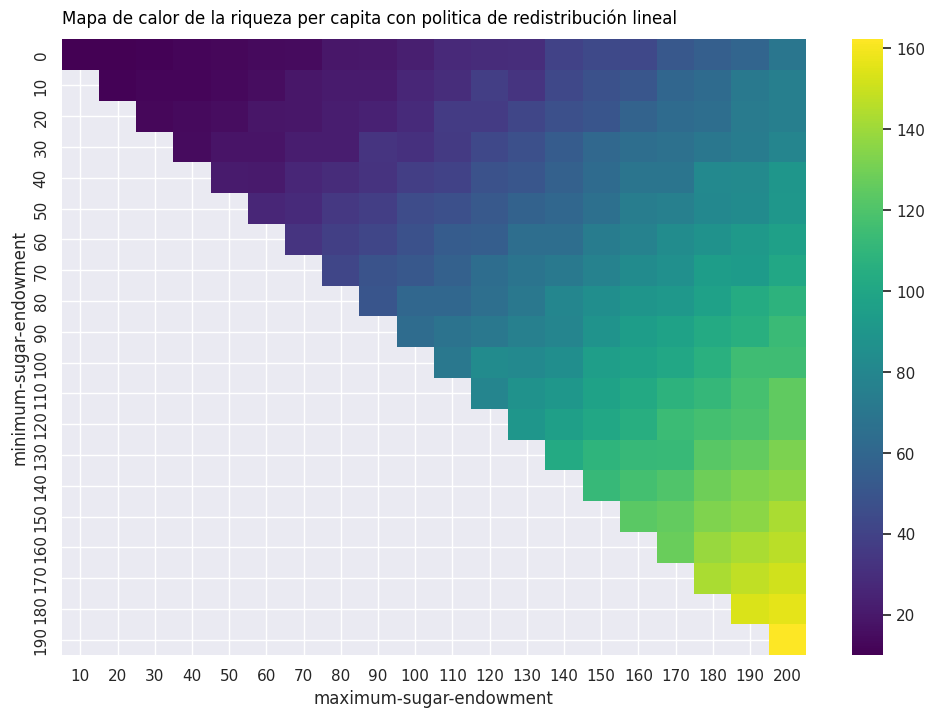

In [20]:
datos_aplanados = datos_ubi.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-productivity")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de la riqueza per capita con politica de redistribución lineal', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Riqueza-Lineal.png',dpi=300, bbox_inches='tight')
plt.show()

# Analizando los resultados de la implementación de la política de redistribución cuadrática de la riqueza.

In [28]:
datos_c = pd.read_csv('Cuadratico/cuadratico.csv')
datos_c.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,quadratical,400,0,0.0,0,0.0,0
1,2,0,10,color-agents-by-decile,quadratical,400,0,0.0,0,0.0,0
2,3,0,20,color-agents-by-decile,quadratical,400,0,0.0,0,0.0,0
3,4,0,30,color-agents-by-decile,quadratical,400,0,0.0,0,0.0,0
4,5,0,40,color-agents-by-decile,quadratical,400,0,0.0,0,0.0,0


In [29]:
datos_c = datos_c.drop(columns= 'redistribution')
datos_c = datos_c.drop(columns= 'initial-population')
datos_c = datos_c.drop(columns= '[run number]')
datos_c = datos_c.drop(columns= 'visualization')
datos_c = datos_c.drop(datos_c[datos_c['[step]'] == 0].index)
datos_c = datos_c.drop(columns='[step]')
datos_c

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.251989,4502,5.940000,2267
42,20,0,0.254688,2231,6.328150,2475
43,20,10,0.283500,2372,7.230875,2752
63,30,0,0.247279,2590,7.333075,3035
64,30,10,0.279130,1684,7.813550,2803
...,...,...,...,...,...,...
435,200,150,0.159101,0,49.814350,17163
436,200,160,0.151505,0,52.675125,18222
437,200,170,0.162018,0,50.633900,14999
438,200,180,0.153463,0,55.522275,16026


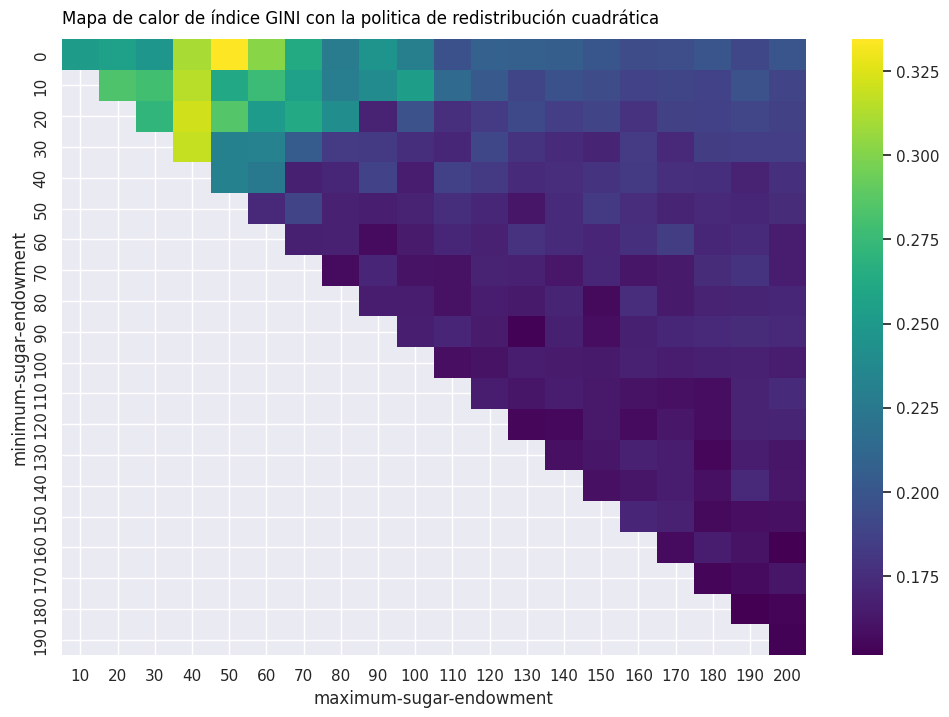

In [30]:
datos_aplanados = datos_c.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-gini")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de índice GINI con la politica de redistribución cuadrática', fontsize=12, color='black', ha='left')
plt.savefig('figuras/GINI-cuad.png',dpi=300, bbox_inches='tight')
plt.show()

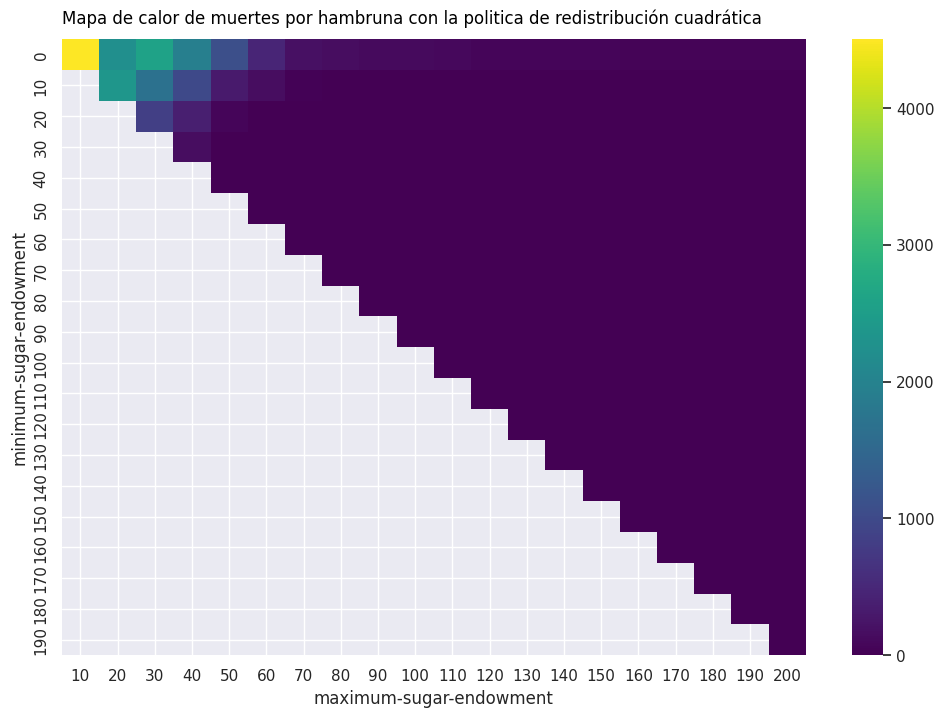

In [31]:
datos_aplanados = datos_c.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="starvation")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de muertes por hambruna con la politica de redistribución cuadrática', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Starv-cuad.png',dpi=300, bbox_inches='tight')
plt.show()

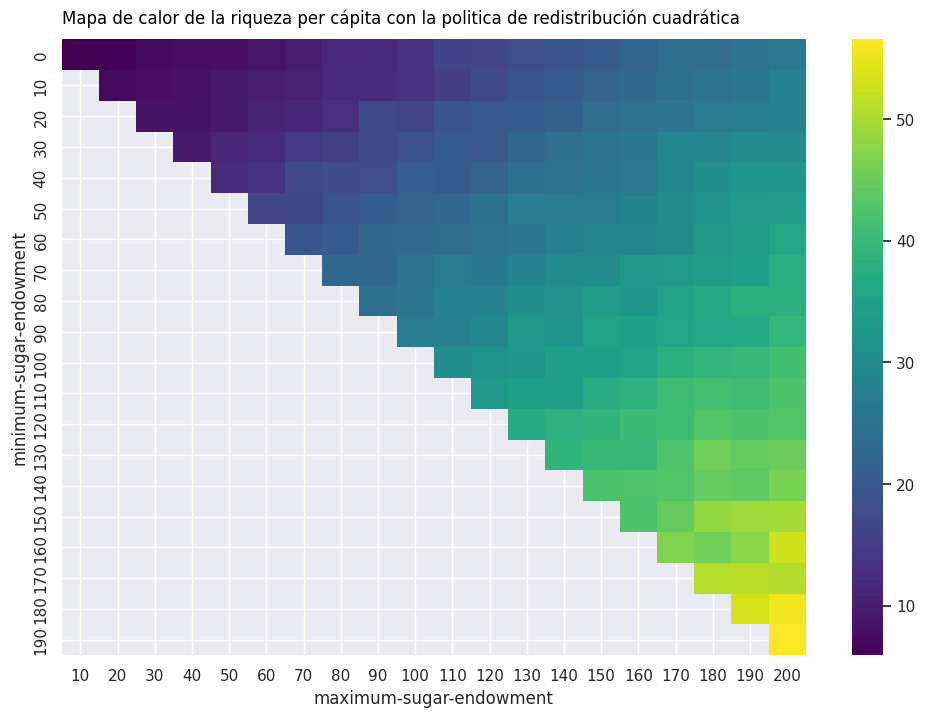

In [32]:
datos_aplanados = datos_c.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-productivity")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de la riqueza per cápita con la politica de redistribución cuadrática', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Riqueza-cuad.png',dpi=300, bbox_inches='tight')
plt.show()

# Analizando los resultados de la implementación de la política de redistribución dirigida de la riqueza

In [33]:
datos_dirigidos = pd.read_csv('Dirigidos/dirigidos.csv')
datos_dirigidos.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,redistribution,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,poorest,400,0,0.0,0,0.0,0
1,2,0,10,color-agents-by-decile,poorest,400,0,0.0,0,0.0,0
2,3,0,20,color-agents-by-decile,poorest,400,0,0.0,0,0.0,0
3,4,0,30,color-agents-by-decile,poorest,400,0,0.0,0,0.0,0
4,5,0,40,color-agents-by-decile,poorest,400,0,0.0,0,0.0,0


In [34]:
datos_dirigidos = datos_dirigidos.drop(columns='[run number]')
datos_dirigidos = datos_dirigidos.drop(columns='redistribution')
datos_dirigidos = datos_dirigidos.drop(columns='visualization')
datos_dirigidos = datos_dirigidos.drop(columns='initial-population')
datos_dirigidos = datos_dirigidos.drop(datos_dirigidos[datos_dirigidos['[step]'] == 0].index)
datos_dirigidos

,maximum-sugar-endowment,minimum-sugar-endowment,[step],avg-gini,starvation,avg-productivity,total-wealth
21,10,0,1000,0.235983,3313,4.483975,1745
42,20,0,1000,0.256218,2481,4.884150,2010
43,20,10,1000,0.261580,1622,5.247325,1933
63,30,0,1000,0.272897,1830,5.342450,1952
64,30,10,1000,0.270873,1193,5.753800,2341
...,...,...,...,...,...,...,...
435,200,150,1000,0.186935,0,40.099500,15383
436,200,160,1000,0.182806,0,41.189525,12766
437,200,170,1000,0.177207,0,42.995375,15725
438,200,180,1000,0.177868,0,45.261050,15616


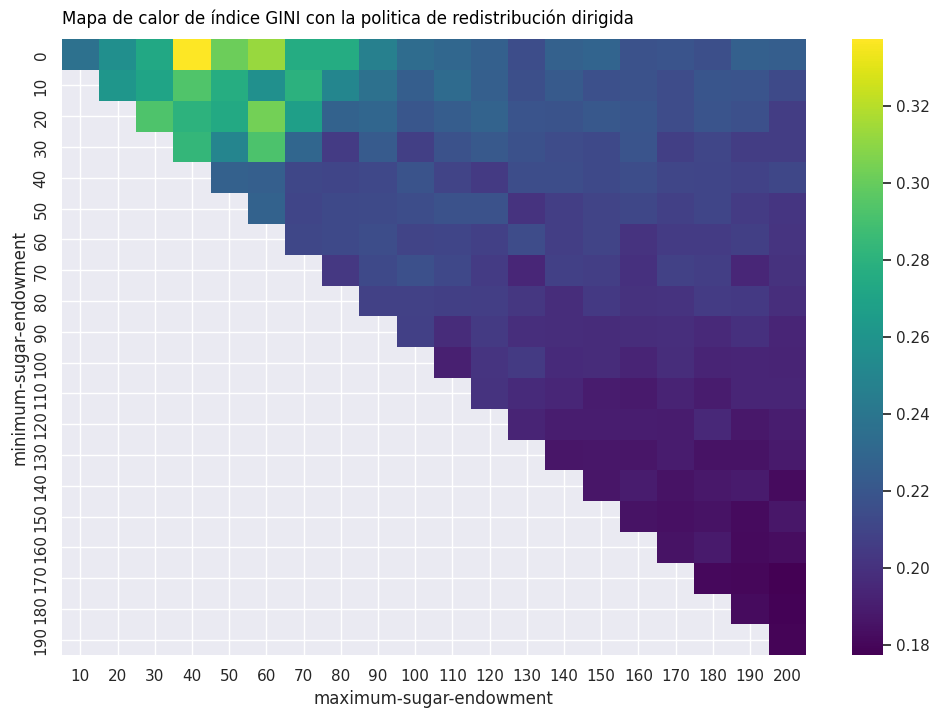

In [35]:
datos_aplanados = datos_dirigidos.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-gini")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de índice GINI con la politica de redistribución dirigida', fontsize=12, color='black', ha='left')
plt.savefig('figuras/GINI-dirigidos.png',dpi=300, bbox_inches='tight')
plt.show()

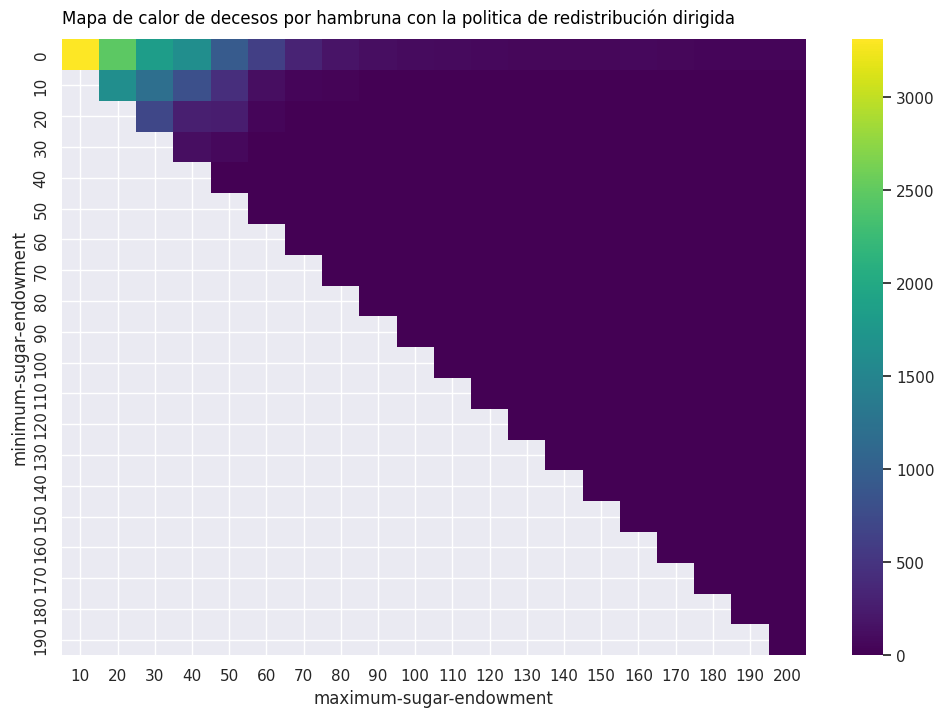

In [36]:
datos_aplanados = datos_dirigidos.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="starvation")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de decesos por hambruna con la politica de redistribución dirigida', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Starv-dirigidos.png',dpi=300, bbox_inches='tight')
plt.show()

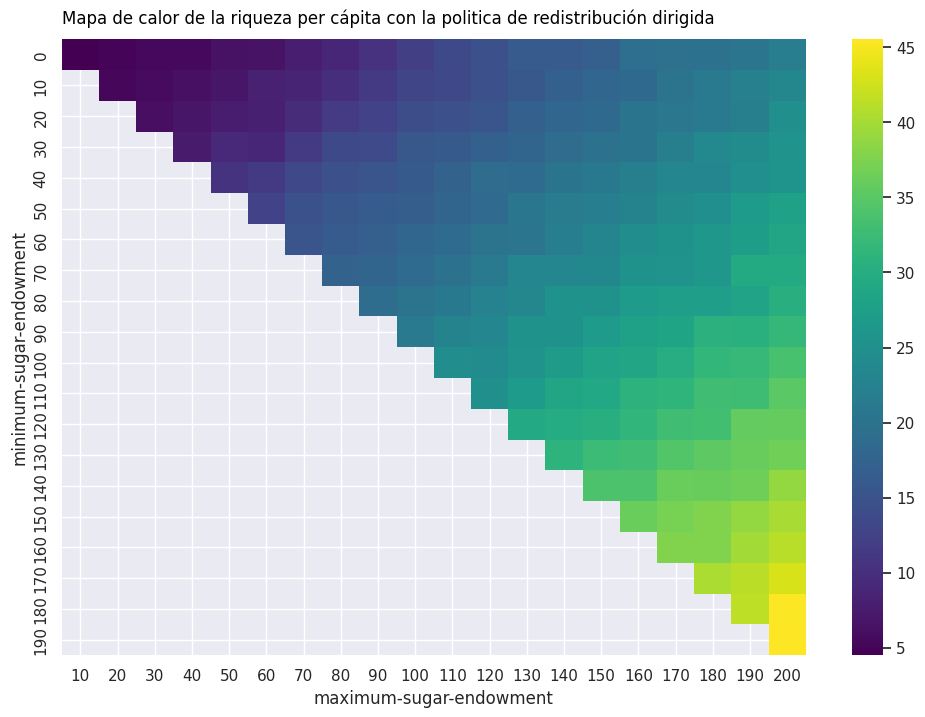

In [37]:
datos_aplanados = datos_dirigidos.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-productivity")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor de la riqueza per cápita con la politica de redistribución dirigida', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Riqueza-dirigidos.png',dpi=300, bbox_inches='tight')
plt.show()